# About Dataset

### Context
Credit score cards are a common risk control method in the financial industry. It uses personal information and data submitted by credit card applicants to predict the probability of future defaults and credit card borrowings. The bank is able to decide whether to issue a credit card to the applicant. Credit scores can objectively quantify the magnitude of risk.
 
Generally speaking, credit score cards are based on historical data. Once encountering large economic fluctuations. Past models may lose their original predictive power. Logistic model is a common method for credit scoring. Because Logistic is suitable for binary classification tasks and can calculate the coefficients of each feature. In order to facilitate understanding and operation, the score card will multiply the logistic regression coefficient by a certain value (such as 100) and round it.
 
At present, with the development of machine learning algorithms. More predictive methods such as Boosting, Random Forest, and Support Vector Machines have been introduced into credit card scoring. However, these methods often do not have good transparency. It may be difficult to provide customers and regulators with a reason for rejection or acceptance.

### Task
Build a machine learning model to predict if an applicant is 'good' or 'bad' client, different from other tasks, the definition of 'good' or 'bad' is not given. You should use some techique, such as vintage analysis to construct you label. Also, unbalance data problem is a big problem in this task.

#### Application Data Explanation

| Feature  |  Explanation  |                  Remarks                  |
|----------|-------------|------------------------------------------|
| ID       | Client Number |     |
| CODE_GENDER | Gender  |      |
| FLAG_OWN_CAR | Is There A Car |        |
| FLAG_OWN_REALTY | Is There A Proprty |        |
| CNT_CHILDREN | Number Of Children |        |
| AMT_INCOME_TOTAL | Annual Income |        |
| NAME_INCOME_TYPE | Income Category |        |
| NAME_EDUCATION_TYPE | Education Level |        |
| NAME_FAMILY_STATUS | Marital Status |        |
| HOUSING TYPE | Way Of Living? |        |
| DAYS_BIRTH | Birthday | Count backwards from current day(0), -1 means yesterday |
| DAYS_EMPLOYED | Start date of employment | Count backwards from current day(0). If positive means the person currently unemployed |
| FLAG_MOBIL | Is There A Mobile Phone |        |
| FLAG_WORK_PHONE | Is There A Work Phone |        |
| FLAG_PHONE | Is There A Phone |        |
| FLAG_EMAIL | Is There An Email |        |
| OCCUPATION_TYPE | Occupation |        |
| CNT_FAM_MEMBERS | Family Size |        |

#### Credit Data Explanation

| Feature  |  Explanation  |                  Remarks                  |
|----------|-------------|------------------------------------------|
| ID       |  Client Number |  |
| MONTHS_BALANCE | Record Month | The month of the extracted data is the starting point, backwards, 0 is the current month, -1 is the previous month, and so on |
| STATUS | Status | 0: 1-29 days past due 1: 30-59 days past due 2: 60-89 days overdue 3: 90-119 days overdue 4: 120-149 days overdue 5: Overdue or bad debts, write-offs for more than 150 days C: paid off that month X: No loan for the month |

## DATA EXPLORATION & CLEANING

In [7]:
import pandas as pd
import numpy as np   
import matplotlib.pyplot as plt
from lifelines import NelsonAalenFitter, CoxPHFitter, KaplanMeierFitter
from lifelines.statistics import logrank_test


In [8]:
application_df = pd.read_csv('Data/application_record.csv')
credit_df = pd.read_csv('Data/credit_record.csv')

In [9]:
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [10]:
application_df.head(10)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
5,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
6,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
7,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0
8,5008813,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0
9,5008814,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0


In [12]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [17]:
credit_df.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


### Handle Null Values

In [20]:
# # Drop rows where column 'OCCUPATION_TYPE' has null values
# application_df.dropna(subset=['OCCUPATION_TYPE'], inplace=True)
# application_df.info()

In [22]:
null_df = application_df[application_df['OCCUPATION_TYPE'].isnull()]
null_df

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
7,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0
8,5008813,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0
9,5008814,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438549,6840098,F,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0
438550,6840100,F,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0
438551,6840102,F,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0


In [24]:
null_df['NAME_INCOME_TYPE'].value_counts()

NAME_INCOME_TYPE
Pensioner               75357
Working                 35886
Commercial associate    16745
State servant            6210
Student                     5
Name: count, dtype: int64

Looking through application_df.info() it seems that OCCUPATION_TYPE seems to be the only column that has null values. Having just a quick scan through the data it seems that a lot the OCCUPATION_TYPE null values belong to ID's with the INCOME_TYPE of pensioners so we can simplty fill their OCCUPATION_TYPE with Retired or Pensioner. The rest of the we can fill with Unknown

In [27]:
# Update 'OCCUPATION_TYPE' to 'Retired' for Pensioners
application_df.loc[
    (application_df['NAME_INCOME_TYPE'] == 'Pensioner') & (application_df['OCCUPATION_TYPE'].isnull()), 
    'OCCUPATION_TYPE'
] = 'Retired'

In [29]:
# Update 'OCCUPATION_TYPE' to 'Unknown' where 'OCCUPATION_TYPE' is null
application_df.loc[application_df['OCCUPATION_TYPE'].isnull(), 'OCCUPATION_TYPE'] = 'Unknown'

In [31]:
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

### Split the Numerical And Categorical Variables
So we can do some investigation

In [34]:
#Create a list of numerical Variables 
numerical_variables = ['ID','CNT_CHILDREN','AMT_INCOME_TOTAL','CNT_FAM_MEMBERS', 'DAYS_EMPLOYED', 'DAYS_BIRTH']

#Create a list of categorical Variables
categorical_variables = ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE','FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'OCCUPATION_TYPE']

In [36]:
cat_application_df = application_df[categorical_variables]
num_application_df = application_df[numerical_variables]

In [38]:
for col in categorical_variables:
    counts =cat_application_df[col].value_counts()
    print(f"Counts for {col}:")
    print(counts)
    print("============================================================")

Counts for CODE_GENDER:
CODE_GENDER
F    294440
M    144117
Name: count, dtype: int64
Counts for FLAG_OWN_CAR:
FLAG_OWN_CAR
N    275459
Y    163098
Name: count, dtype: int64
Counts for FLAG_OWN_REALTY:
FLAG_OWN_REALTY
Y    304074
N    134483
Name: count, dtype: int64
Counts for NAME_INCOME_TYPE:
NAME_INCOME_TYPE
Working                 226104
Commercial associate    100757
Pensioner                75493
State servant            36186
Student                     17
Name: count, dtype: int64
Counts for NAME_EDUCATION_TYPE:
NAME_EDUCATION_TYPE
Secondary / secondary special    301821
Higher education                 117522
Incomplete higher                 14851
Lower secondary                    4051
Academic degree                     312
Name: count, dtype: int64
Counts for NAME_FAMILY_STATUS:
NAME_FAMILY_STATUS
Married                 299828
Single / not married     55271
Civil marriage           36532
Separated                27251
Widow                    19675
Name: count, dtype: in

In [40]:
num_application_df.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,CNT_FAM_MEMBERS,DAYS_EMPLOYED,DAYS_BIRTH
count,4.385570e+05,438557.000000,4.385570e+05,438557.000000,438557.000000,438557.000000
mean,6.022176e+06,0.427390,1.875243e+05,2.194465,60563.675328,-15997.904649
std,5.716370e+05,0.724882,1.100869e+05,0.897207,138767.799647,4185.030007
min,5.008804e+06,0.000000,2.610000e+04,1.000000,-17531.000000,-25201.000000
25%,5.609375e+06,0.000000,1.215000e+05,2.000000,-3103.000000,-19483.000000
50%,6.047745e+06,0.000000,1.607805e+05,2.000000,-1467.000000,-15630.000000
75%,6.456971e+06,1.000000,2.250000e+05,3.000000,-371.000000,-12514.000000
max,7.999952e+06,19.000000,6.750000e+06,20.000000,365243.000000,-7489.000000


### Filter Application Records
filter the application record so that only uniques IDS that are shared between the Credit and Application Dataframes remain

In [43]:
# how many unique ID in application record?
print("Application Unique Ids:", len(set(application_df['ID'])))

# how many unique ID in credit record?
print("Credit Unique Ids:",len(set(credit_df['ID'])))

# how many IDs do two tables share?
print("Shared Unique Ids",len(set(application_df['ID']).intersection(set(credit_df['ID']))))

Application Unique Ids: 438510
Credit Unique Ids: 45985
Shared Unique Ids 36457


In [45]:
# Get the unique IDs from both dataframes
shared_ids = credit_df['ID'][credit_df['ID'].isin(application_df['ID'])]

# Now filter both DataFrames to keep only those shared IDs
credit_filtered = credit_df[credit_df['ID'].isin(shared_ids)]
application_filtered = application_df[application_df['ID'].isin(shared_ids)]

In [47]:
application_filtered

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Unknown,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Unknown,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434808,5149828,M,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,-17348,-2420,1,0,0,0,Managers,2.0
434809,5149834,F,N,Y,0,157500.0,Commercial associate,Higher education,Married,House / apartment,-12387,-1325,1,0,1,1,Medicine staff,2.0
434810,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,-12387,-1325,1,0,1,1,Medicine staff,2.0
434811,5150049,F,N,Y,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,-17958,-655,1,0,0,0,Sales staff,2.0


In [49]:
credit_filtered

,ID,MONTHS_BALANCE,STATUS
92938,5008804,0,C
92939,5008804,-1,C
92940,5008804,-2,C
92941,5008804,-3,C
92942,5008804,-4,C
...,...,...,...
1048570,5150487,-25,C
1048571,5150487,-26,C
1048572,5150487,-27,C
1048573,5150487,-28,C


In [51]:
# Count the number of unique IDs in the credit_df
unique_ids_count = credit_df['ID'].nunique()
unique_ids_count

45985

# Vintage Analysis

### Convert credit data to wide format in which every ID is a single row

In [59]:
grouped = credit_filtered.groupby('ID')
pivot_tb = credit_filtered.pivot(index = 'ID', columns = 'MONTHS_BALANCE', values = 'STATUS')

# Smallest value of MONTHS_BALANCE, is the month when loan was granted
pivot_tb['open_month'] = grouped['MONTHS_BALANCE'].min()

# Biggest value of MONTHS_BALANCE, is either when we stopped observing the account or when it was cancelled 
pivot_tb['end_month'] = grouped['MONTHS_BALANCE'].max()
pivot_tb['ID'] = pivot_tb.index
pivot_tb = pivot_tb[['ID', 'open_month', 'end_month']]

# Calculate observe window
pivot_tb['window'] = pivot_tb['end_month'] - pivot_tb['open_month']
pivot_tb.reset_index(drop = True, inplace = True)

# Join calculated information
credit_filtered_df = pd.merge(credit_filtered, pivot_tb, on = 'ID', how = 'left') 
vintage_credit_df = credit_filtered_df.copy()
vintage_credit_df

,ID,MONTHS_BALANCE,STATUS,open_month,end_month,window
0,5008804,0,C,-15,0,15
1,5008804,-1,C,-15,0,15
2,5008804,-2,C,-15,0,15
3,5008804,-3,C,-15,0,15
4,5008804,-4,C,-15,0,15
...,...,...,...,...,...,...
777710,5150487,-25,C,-29,0,29
777711,5150487,-26,C,-29,0,29
777712,5150487,-27,C,-29,0,29
777713,5150487,-28,C,-29,0,29


Now we need to get rid of customers that have less than a 20month observe window so that we have a long enough windo to properly observe patterns in behaviour.

In [62]:
# delete users whose observe window less than 20
vintage_credit_df = vintage_credit_df[vintage_credit_df['window'] > 20].copy()
vintage_credit_df.reset_index(drop = True, inplace = True)

# creating a column that tells if a lone is 60 days past due or not
vintage_credit_df['status'] = np.where((vintage_credit_df['STATUS'] == '2') | (vintage_credit_df['STATUS'] == '3' )| (vintage_credit_df['STATUS'] == '4' )| (vintage_credit_df['STATUS'] == '5'), 1, 0)  

# 1: 60 days overdue 0: not
vintage_credit_df['status'] = vintage_credit_df['status'].astype(np.int8)

# calculate month on book: how many months after opening account
vintage_credit_df['month_on_book'] = vintage_credit_df['MONTHS_BALANCE'] - vintage_credit_df['open_month'] 
vintage_credit_df.sort_values(by = ['ID','month_on_book'], inplace = True)
vintage_credit_df

,ID,MONTHS_BALANCE,STATUS,open_month,end_month,window,status,month_on_book
29,5008806,-29,X,-29,0,29,0,0
28,5008806,-28,0,-29,0,29,0,1
27,5008806,-27,X,-29,0,29,0,2
26,5008806,-26,X,-29,0,29,0,3
25,5008806,-25,X,-29,0,29,0,4
...,...,...,...,...,...,...,...,...
549346,5150487,-4,C,-29,0,29,0,25
549345,5150487,-3,C,-29,0,29,0,26
549344,5150487,-2,C,-29,0,29,0,27
549343,5150487,-1,C,-29,0,29,0,28


In [64]:
# count the number of unique IDs per open_month
denominator = pivot_tb.groupby(['open_month']).agg({'ID': ['count']}) 
denominator.reset_index(inplace = True)
denominator.columns = ['open_month','sta_sum']
denominator

,open_month,sta_sum
0,-60,321
1,-59,307
2,-58,333
3,-57,304
4,-56,345
...,...,...
56,-4,765
57,-3,800
58,-2,643
59,-1,551


In [66]:
# Keep only necessary columns for merging
vintage = vintage_credit_df.groupby(['open_month','month_on_book']).agg({'ID': ['count']}) 
vintage.reset_index(inplace = True)
vintage.columns = ['open_month','month_on_book','sta_sum'] 
vintage['due_count'] = np.nan
vintage = vintage[['open_month','month_on_book','due_count']] # delete aggerate column
vintage = pd.merge(vintage, denominator, on = ['open_month'], how = 'left') # join sta_sum column to vintage table
vintage

,open_month,month_on_book,due_count,sta_sum
0,-60,0,NaN,321
1,-60,1,NaN,321
2,-60,2,NaN,321
3,-60,3,NaN,321
4,-60,4,NaN,321
...,...,...,...,...
1655,-21,17,NaN,650
1656,-21,18,NaN,650
1657,-21,19,NaN,650
1658,-21,20,NaN,650


In [68]:
# Outer loop (j): Loops through the open_month from -60 to 0 (accounts opened within a 60-month window).
for j in range(-60,1): 
    ls = []
    # Inner loop (i): Loops through the month_on_book, representing the number of months after the account was opened.
    for i in range(0,61):
        # get ID which satisfy the condition
        due = list(vintage_credit_df[(vintage_credit_df['status'] == 1) & (vintage_credit_df['month_on_book'] == i) & (vintage_credit_df['open_month'] == j)]['ID']) 
        ls.extend(due) # As time goes, add bad customers
        # calculate non-duplicate ID numbers using set()
        vintage.loc[(vintage['month_on_book'] == i) & (vintage['open_month'] == j), 'due_count'] = len(set(ls)) 
        
vintage['sta_rate']  = vintage['due_count'] / vintage['sta_sum'] # calculate cumulative % of bad customers
vintage   

,open_month,month_on_book,due_count,sta_sum,sta_rate
0,-60,0,0.0,321,0.00
1,-60,1,0.0,321,0.00
2,-60,2,0.0,321,0.00
3,-60,3,0.0,321,0.00
4,-60,4,0.0,321,0.00
...,...,...,...,...,...
1655,-21,17,13.0,650,0.02
1656,-21,18,13.0,650,0.02
1657,-21,19,13.0,650,0.02
1658,-21,20,13.0,650,0.02


In [75]:
# Vintage wide table
vintage_wide = vintage.pivot(index = 'open_month',
                             columns = 'month_on_book',
                             values = 'sta_rate')
vintage_wide

month_on_book,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
open_month,,,,,,,,,,,,,,,,,,,,,
-60,0.000000,0.000000,0.000000,0.000000,0.000000,0.003115,0.003115,0.009346,0.009346,0.012461,...,0.028037,0.028037,0.028037,0.028037,0.028037,0.028037,0.028037,0.028037,0.028037,0.028037
-59,0.000000,0.000000,0.000000,0.003257,0.003257,0.003257,0.006515,0.006515,0.006515,0.013029,...,0.032573,0.032573,0.032573,0.035831,0.035831,0.035831,0.035831,0.035831,0.035831,NaN
-58,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.006006,0.009009,0.009009,...,0.024024,0.024024,0.024024,0.024024,0.024024,0.024024,0.024024,0.024024,NaN,NaN
-57,0.000000,0.000000,0.000000,0.000000,0.003289,0.003289,0.003289,0.003289,0.003289,0.003289,...,0.019737,0.019737,0.019737,0.019737,0.019737,0.019737,0.019737,NaN,NaN,NaN
-56,0.000000,0.000000,0.002899,0.002899,0.008696,0.011594,0.011594,0.020290,0.020290,0.026087,...,0.043478,0.043478,0.043478,0.043478,0.046377,0.046377,NaN,NaN,NaN,NaN
-55,0.000000,0.000000,0.002717,0.008152,0.016304,0.019022,0.024457,0.024457,0.024457,0.024457,...,0.046196,0.046196,0.046196,0.046196,0.046196,NaN,NaN,NaN,NaN,NaN
-54,0.000000,0.000000,0.000000,0.002793,0.002793,0.002793,0.005587,0.008380,0.008380,0.011173,...,0.030726,0.030726,0.030726,0.030726,NaN,NaN,NaN,NaN,NaN,NaN
-53,0.000000,0.000000,0.000000,0.000000,0.002653,0.002653,0.007958,0.010610,0.010610,0.013263,...,0.031830,0.031830,0.031830,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-52,0.000000,0.000000,0.008639,0.010799,0.010799,0.010799,0.012959,0.012959,0.015119,0.017279,...,0.025918,0.025918,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


This is a standard vingtage analysis table. The rows represent the month the accounts was open (This would Typically be open date), columns represent months after opening accounts, and values are accumulated past-due rate. As open-month closes to 0, the observe window shortens, thus the bottom half triangular field is filled by nan.

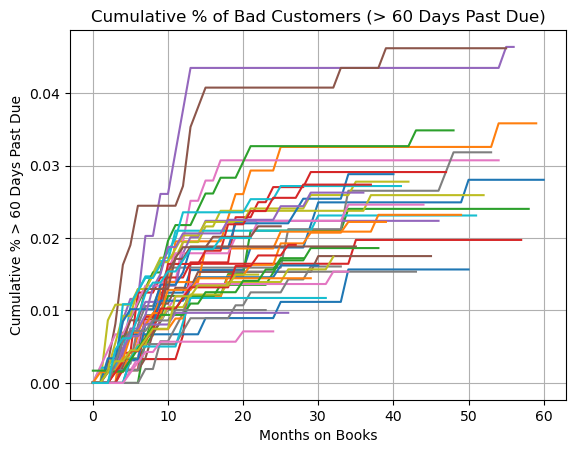

In [78]:
# plot vintage line chart
plt.rcParams['figure.facecolor'] = 'white'
vintage0 = vintage_wide.replace(0,np.nan)
lst = [i for i in range(0,61)]
vintage_wide[lst].T.plot(legend = False, grid = True, title = 'Cumulative % of Bad Customers (> 60 Days Past Due)')
#plt.axvline(30)
#plt.axvline(25)
#plt.axvline(20)
plt.xlabel('Months on Books')
plt.ylabel('Cumulative % > 60 Days Past Due')
plt.show()

### Split Into Cohorts

Because of two reasons, account cancellation and observation, our observe on accounts will be truncated. Observe window is a significant parameter to be considered. If the observe window is too short, users' behavior will not fully show off, which will bring unnecessary noise to our data.

In order to observe how many accounts increase as observed window extend, we plot this.

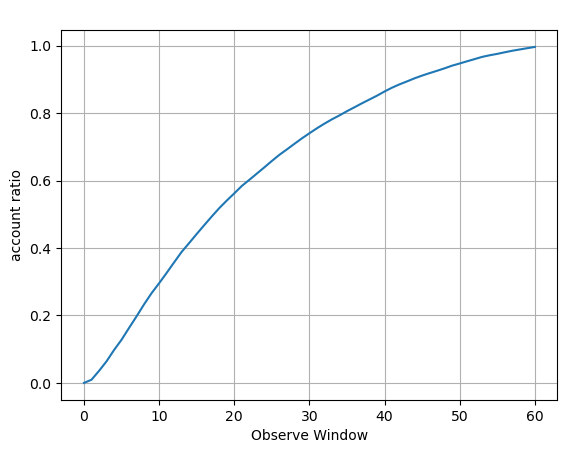

In [82]:
lst = []
for i in range(0,61):
    ratio = len(pivot_tb[pivot_tb['window'] < i]) / len(set(pivot_tb['ID']))
    lst.append(ratio)
    
pd.Series(lst).plot(legend = False, grid = True, title = ' ')
plt.xlabel('Observe Window')
plt.ylabel('account ratio')
plt.show()

### Defining A Bad Applicant

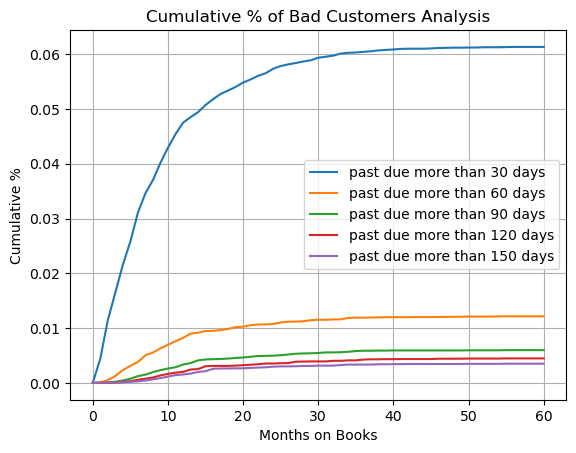

In [85]:
credit = vintage_credit_df.copy()
def calculate_observe(credit, command):
    '''calculate observe window
    '''
    id_sum = len(set(pivot_tb['ID']))
    credit['status'] = 0
    exec(command)
    #credit.loc[(credit['STATUS'] == '4' )| (credit['STATUS'] == '5'), 'status'] = 1
    credit['month_on_book'] = credit['MONTHS_BALANCE'] - credit['open_month']
    minagg = credit[credit['status'] == 1].groupby('ID')['month_on_book'].min()
    minagg = pd.DataFrame(minagg)
    minagg['ID'] = minagg.index
    obslst = pd.DataFrame({'month_on_book':range(0,61), 'rate': None})
    lst = []
    for i in range(0,61):
        due = list(minagg[minagg['month_on_book']  == i]['ID'])
        lst.extend(due)
        obslst.loc[obslst['month_on_book'] == i, 'rate'] = len(set(lst)) / id_sum 
    return obslst['rate']

command = "credit.loc[(credit['STATUS'] == '0') | (credit['STATUS'] == '1') | (credit['STATUS'] == '2') | (credit['STATUS'] == '3' )| (credit['STATUS'] == '4' )| (credit['STATUS'] == '5'), 'status'] = 1"   
morethan1 = calculate_observe(credit, command)
command = "credit.loc[(credit['STATUS'] == '1') | (credit['STATUS'] == '2') | (credit['STATUS'] == '3' )| (credit['STATUS'] == '4' )| (credit['STATUS'] == '5'), 'status'] = 1"   
morethan30 = calculate_observe(credit, command)
command = "credit.loc[(credit['STATUS'] == '2') | (credit['STATUS'] == '3' )| (credit['STATUS'] == '4' )| (credit['STATUS'] == '5'), 'status'] = 1"
morethan60 = calculate_observe(credit, command)
command = "credit.loc[(credit['STATUS'] == '3' )| (credit['STATUS'] == '4' )| (credit['STATUS'] == '5'), 'status'] = 1"
morethan90 = calculate_observe(credit, command)
command = "credit.loc[(credit['STATUS'] == '4' )| (credit['STATUS'] == '5'), 'status'] = 1"
morethan120 = calculate_observe(credit, command)
command = "credit.loc[(credit['STATUS'] == '5'), 'status'] = 1"
morethan150 = calculate_observe(credit, command)
obslst = pd.DataFrame({'past due more than 30 days': morethan30,
                       'past due more than 60 days': morethan60,
                       'past due more than 90 days': morethan90,
                       'past due more than 120 days': morethan120,
                       'past due more than 150 days': morethan150
                        })

obslst.plot(grid = True, title = 'Cumulative % of Bad Customers Analysis')
plt.xlabel('Months on Books')
plt.ylabel('Cumulative %')
plt.show()

The chart above shows how long we need to watch a customer to understand their true behavior. It tells us that most customers who will fall behind on payments do so at 30, 60, 90, 120, or 150 days past due by the 20th month. This means we should track a customer for at least 20 months before deciding if they are a good or bad customer. So, we can remove any applicants from our data who haven't been observed for at least 20 months.

Now that we know how long to observe a customer, we need to decide when a customer should be considered bad. Is it when they are 30, 60, 90, 120, or 150 days late on payments? Looking at the table, we see that 87% of customers who are past due are less than 30 days late, which is too strict as a cutoff. On the other hand, only 0.4% of customers are more than 150 days late, which is too lenient. So, we settle on 30 days past due as the mark, since 11.6% of customers fall into this category, while the next level, 60 days, only has 1.6%.

In [89]:
credit0 = credit_filtered_df

def calculate_rate(pivot_tb, command): 
    '''calculate bad customer rate
    '''
    credit0['status'] = None
    exec(command) # excuate input code
    sumagg = credit0.groupby('ID')['status'].agg(sum)
    pivot_tb = pd.merge(pivot_tb, sumagg, on = 'ID', how = 'left')
    pivot_tb.loc[pivot_tb['status'] > 1, 'status'] = 1
    rate = pivot_tb['status'].sum() / len(pivot_tb)
    return round(rate, 5)

command = "credit0.loc[(credit0['STATUS'] == '0') | (credit0['STATUS'] == '1') | (credit0['STATUS'] == '2') | (credit0['STATUS'] == '3' )| (credit0['STATUS'] == '4' )| (credit0['STATUS'] == '5'), 'status'] = 1"   
morethan1 = calculate_rate(pivot_tb, command)
command = "credit0.loc[(credit0['STATUS'] == '1') | (credit0['STATUS'] == '2') | (credit0['STATUS'] == '3' )| (credit0['STATUS'] == '4' )| (credit0['STATUS'] == '5'), 'status'] = 1"   
morethan30 = calculate_rate(pivot_tb, command)
command = "credit0.loc[(credit0['STATUS'] == '2') | (credit0['STATUS'] == '3' )| (credit0['STATUS'] == '4' )| (credit0['STATUS'] == '5'), 'status'] = 1"
morethan60 = calculate_rate(pivot_tb, command)
command = "credit0.loc[(credit0['STATUS'] == '3' )| (credit0['STATUS'] == '4' )| (credit0['STATUS'] == '5'), 'status'] = 1"
morethan90 = calculate_rate(pivot_tb, command)
command = "credit0.loc[(credit0['STATUS'] == '4' )| (credit0['STATUS'] == '5'), 'status'] = 1"
morethan120 = calculate_rate(pivot_tb, command)
command = "credit0.loc[(credit0['STATUS'] == '5'), 'status'] = 1"
morethan150 = calculate_rate(pivot_tb, command)

summary_dt = pd.DataFrame({'situation':['past due more than 1 day',
                               'past due more than 30 days',
                               'past due more than 60 days',
                               'past due more than 90 days',
                               'past due more than 120 days',
                               'past due more than 150 days'],
                      'bad customer ratio':[morethan1,
                               morethan30,
                               morethan60,
                               morethan90, 
                               morethan120,
                               morethan150, 
                      ]})
summary_dt

/var/folders/46/w6ssnrz90jd99dt2brnl5b2m0000gn/T/ipykernel_87756/1842507456.py:8: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  sumagg = credit0.groupby('ID')['status'].agg(sum)
/var/folders/46/w6ssnrz90jd99dt2brnl5b2m0000gn/T/ipykernel_87756/1842507456.py:8: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  sumagg = credit0.groupby('ID')['status'].agg(sum)
/var/folders/46/w6ssnrz90jd99dt2brnl5b2m0000gn/T/ipykernel_87756/1842507456.py:8: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep curre

,situation,bad customer ratio
0,past due more than 1 day,0.87780
1,past due more than 30 days,0.11770
2,past due more than 60 days,0.01690
3,past due more than 90 days,0.00828
4,past due more than 120 days,0.00620
5,past due more than 150 days,0.00494


### Now lets Categorise applicants into Good or Bad based on our above Definition

In [92]:
vintage_credit_df['ID'].nunique()

15166

In [94]:
# Assign 'Good' for status in [0,'C','X'] Assign 'Bad' for status in [1, 2, 3, 4, 5]
vintage_credit_df['CUSTOMER_RATING'] = np.where((vintage_credit_df['STATUS'] == '1') | (vintage_credit_df['STATUS'] == '2') | (vintage_credit_df['STATUS'] == '3' )| (vintage_credit_df['STATUS'] == '4' )| (vintage_credit_df['STATUS'] == '5'), 1, 0)  

# 1: 30 days overdue 0: not
vintage_credit_df['CUSTOMER_RATING'] = vintage_credit_df['CUSTOMER_RATING'].astype(np.int8)

In [96]:
vintage_credit_df['CUSTOMER_RATING'].value_counts()

CUSTOMER_RATING
0    541870
1      7502
Name: count, dtype: int64

In [98]:
# Get the unique IDs from both dataframes
shared_vintage_ids = vintage_credit_df['ID'][vintage_credit_df['ID'].isin(application_df['ID'])]

# Now filter both DataFrames to keep only those shared IDs
credit_filtered_v2 = vintage_credit_df[vintage_credit_df['ID'].isin(shared_vintage_ids)]
application_filtered_v2 = application_df[application_df['ID'].isin(shared_vintage_ids)]
application_filtered_v2.reset_index()

# Group by 'ID' and apply aggregation (example: summing up values)
flat_vintage_credit_df = vintage_credit_df.groupby(['ID']).sum()
flat_vintage_credit_df = flat_vintage_credit_df.reset_index()

# Display the result
flat_vintage_credit_df
flat_vintage_credit_df['CUSTOMER_RATING'] = np.where((flat_vintage_credit_df['CUSTOMER_RATING'] > 0 ), 1, 0)  

# Merge the two DataFrames on 'ID'
application_filtered_v2 = application_filtered_v2.merge(flat_vintage_credit_df[['ID', 'CUSTOMER_RATING']], on='ID', how='left')
application_filtered_v2

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,STATUS_EMPLOYMENT,CUSTOMER_RATING
0,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,Employed,0
1,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,Employed,0
2,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,Employed,0
3,5112956,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,-16872,-769,1,1,1,1,Accountants,2.0,Employed,0
4,5008825,F,Y,N,0,130500.0,Working,Incomplete higher,Married,House / apartment,-10669,-1103,1,0,0,0,Accountants,2.0,Employed,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15161,5149145,M,Y,Y,0,247500.0,Working,Secondary / secondary special,Married,House / apartment,-10952,-3577,1,1,0,0,Laborers,2.0,Employed,1
15162,5149158,M,Y,Y,0,247500.0,Working,Secondary / secondary special,Married,House / apartment,-10952,-3577,1,1,0,0,Laborers,2.0,Employed,1
15163,5149729,M,Y,Y,0,90000.0,Working,Secondary / secondary special,Married,House / apartment,-19101,-1721,1,0,0,0,Unknown,2.0,Employed,1
15164,5149834,F,N,Y,0,157500.0,Commercial associate,Higher education,Married,House / apartment,-12387,-1325,1,0,1,1,Medicine staff,2.0,Employed,1


# Predictive Analysis

In [101]:
application_filtered_v2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15166 entries, 0 to 15165
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   15166 non-null  int64  
 1   CODE_GENDER          15166 non-null  object 
 2   FLAG_OWN_CAR         15166 non-null  object 
 3   FLAG_OWN_REALTY      15166 non-null  object 
 4   CNT_CHILDREN         15166 non-null  int64  
 5   AMT_INCOME_TOTAL     15166 non-null  float64
 6   NAME_INCOME_TYPE     15166 non-null  object 
 7   NAME_EDUCATION_TYPE  15166 non-null  object 
 8   NAME_FAMILY_STATUS   15166 non-null  object 
 9   NAME_HOUSING_TYPE    15166 non-null  object 
 10  DAYS_BIRTH           15166 non-null  int64  
 11  DAYS_EMPLOYED        15166 non-null  int64  
 12  FLAG_MOBIL           15166 non-null  int64  
 13  FLAG_WORK_PHONE      15166 non-null  int64  
 14  FLAG_PHONE           15166 non-null  int64  
 15  FLAG_EMAIL           15166 non-null 

Lets remove uninformative columns 'ID', 'FLAG_MOBIL','FLAG_WORK_PHONE','FLAG_PHONE','FLAG_EMAIL'

In [105]:
application_filtered_v2.drop(columns=['ID', 'FLAG_MOBIL','FLAG_WORK_PHONE','FLAG_PHONE','FLAG_EMAIL'], inplace=True)
application_filtered_v2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15166 entries, 0 to 15165
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CODE_GENDER          15166 non-null  object 
 1   FLAG_OWN_CAR         15166 non-null  object 
 2   FLAG_OWN_REALTY      15166 non-null  object 
 3   CNT_CHILDREN         15166 non-null  int64  
 4   AMT_INCOME_TOTAL     15166 non-null  float64
 5   NAME_INCOME_TYPE     15166 non-null  object 
 6   NAME_EDUCATION_TYPE  15166 non-null  object 
 7   NAME_FAMILY_STATUS   15166 non-null  object 
 8   NAME_HOUSING_TYPE    15166 non-null  object 
 9   DAYS_BIRTH           15166 non-null  int64  
 10  DAYS_EMPLOYED        15166 non-null  int64  
 11  OCCUPATION_TYPE      15166 non-null  object 
 12  CNT_FAM_MEMBERS      15166 non-null  float64
 13  STATUS_EMPLOYMENT    15166 non-null  object 
 14  CUSTOMER_RATING      15166 non-null  int64  
dtypes: float64(2), int64(4), object(9)
m

## Split Data into train & Test

In [198]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from imblearn.combine import SMOTEENN
from collections import Counter

In [185]:
X = application_filtered_v2.drop('CUSTOMER_RATING', axis=1)  # Features (drop the target column)
y = application_filtered_v2['CUSTOMER_RATING']               # Target column (the label you're trying to predict)

# Split the data into train (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Since our target variable is a categorical type we would be doing a classification type prediction using random forrest. Our choice of random forrest is because it allows us to use class weights which would help us partially address our class imbalance problem. We will also be employing over and undersampling as another method to help combat the class imbalance.

In [188]:
X_train

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,STATUS_EMPLOYMENT
12379,M,Y,N,2,270000.0,Working,Secondary / secondary special,Married,House / apartment,-18147,-1101,Managers,4.0,Employed
3488,F,N,Y,0,135000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-13384,-381,Unknown,1.0,Employed
4519,F,N,Y,2,202500.0,Working,Secondary / secondary special,Married,Municipal apartment,-11468,-4448,Laborers,4.0,Employed
13253,M,Y,Y,0,135000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-22253,365243,Retired,2.0,Unemployed
483,F,Y,Y,1,112500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15109,-1956,Core staff,3.0,Employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5191,F,N,Y,0,270000.0,Pensioner,Higher education,Single / not married,House / apartment,-21299,365243,Retired,1.0,Unemployed
13418,F,N,N,0,405000.0,Commercial associate,Higher education,Married,House / apartment,-13692,-200,Managers,2.0,Employed
5390,F,Y,N,0,337500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-9766,-303,Unknown,1.0,Employed
860,F,N,Y,0,135000.0,Working,Secondary / secondary special,Married,House / apartment,-11905,-2470,Cooking staff,2.0,Employed


In [190]:
one_hot_encoding = ['CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','STATUS_EMPLOYMENT']
label_encoding = ['NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE']

# One-hot encoding for categorical columns
X_train[one_hot_encoding] = pd.get_dummies(X_train[one_hot_encoding], drop_first=True)
X_test[one_hot_encoding] = pd.get_dummies(X_test[one_hot_encoding], drop_first=True)

X_train[one_hot_encoding] = X_train[one_hot_encoding].astype(int)
X_test[one_hot_encoding] = X_test[one_hot_encoding].astype(int)

# Label encoding for ordinal features
le = LabelEncoder()

for col in label_encoding:
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.fit_transform(X_test[col])

    # Print the mapping of labels to numbers
    print(f"Label encoding for {col}:")
    for index, label in enumerate(le.classes_):
        print(f"{label} -> {index}")
    print() # For spacing between columns

# Check for non-numerical columns
X_train

Label encoding for NAME_INCOME_TYPE:
Commercial associate -> 0
Pensioner -> 1
State servant -> 2
Student -> 3
Working -> 4

Label encoding for NAME_EDUCATION_TYPE:
Academic degree -> 0
Higher education -> 1
Incomplete higher -> 2
Lower secondary -> 3
Secondary / secondary special -> 4

Label encoding for NAME_FAMILY_STATUS:
Civil marriage -> 0
Married -> 1
Separated -> 2
Single / not married -> 3
Widow -> 4

Label encoding for NAME_HOUSING_TYPE:
Co-op apartment -> 0
House / apartment -> 1
Municipal apartment -> 2
Office apartment -> 3
Rented apartment -> 4
With parents -> 5

Label encoding for OCCUPATION_TYPE:
Accountants -> 0
Cleaning staff -> 1
Cooking staff -> 2
Core staff -> 3
Drivers -> 4
HR staff -> 5
High skill tech staff -> 6
IT staff -> 7
Laborers -> 8
Low-skill Laborers -> 9
Managers -> 10
Medicine staff -> 11
Private service staff -> 12
Realty agents -> 13
Retired -> 14
Sales staff -> 15
Secretaries -> 16
Security staff -> 17
Unknown -> 18
Waiters/barmen staff -> 19



,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,STATUS_EMPLOYMENT
12379,1,1,0,2,270000.0,4,4,1,1,-18147,-1101,10,4.0,0
3488,0,0,1,0,135000.0,0,4,3,1,-13384,-381,18,1.0,0
4519,0,0,1,2,202500.0,4,4,1,2,-11468,-4448,8,4.0,0
13253,1,1,1,0,135000.0,1,4,1,1,-22253,365243,14,2.0,1
483,0,1,1,1,112500.0,0,4,1,1,-15109,-1956,3,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5191,0,0,1,0,270000.0,1,1,3,1,-21299,365243,14,1.0,1
13418,0,0,0,0,405000.0,0,1,1,1,-13692,-200,10,2.0,0
5390,0,1,0,0,337500.0,4,4,3,1,-9766,-303,18,1.0,0
860,0,0,1,0,135000.0,4,4,1,1,-11905,-2470,2,2.0,0


In [192]:
# Display class distribution before re-sampling
print(f"Before Re-sampling: {Counter(y_train)}")

# Initialize SMOTE + ENN
smote_enn = SMOTEENN(random_state=42)

# Apply SMOTE + ENN to the training set
X_resampled, y_resampled = smote_enn.fit_resample(X_train, y_train)

# Display class distribution after re-sampling
print(f"After Re-sampling: {Counter(y_resampled)}")

Before Re-sampling: Counter({0: 10327, 1: 1805})
After Re-sampling: Counter({0: 6749, 1: 5493})


In [194]:
# Assign class weights
model = RandomForestClassifier(class_weight='balanced')

# Train the model
model.fit(X_resampled, y_resampled)

RandomForestClassifier(class_weight='balanced')

In [200]:
# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90      2604
           1       0.34      0.30      0.32       430

    accuracy                           0.82      3034
   macro avg       0.62      0.60      0.61      3034
weighted avg       0.81      0.82      0.81      3034



# Data Analytics

- Lets convert the DAYS_BIRTH to and AGE column so that it makes more sense in our analytics
- I would add an unemployed or employed cloumn for and extra dimension of insight
- I would also convert the DAYS_EMPLOYED to a years employed 

In [ ]:
# Function to check if DAYS_EMPLOYED is positive or negative
def determine_employment_status(days):
    if days < 0:
        return 'Employed'
    elif days >= 0:
        return 'Unemployed'

application_df.loc[:, 'STATUS_EMPLOYMENT'] = application_df['DAYS_EMPLOYED'].apply(determine_employment_status)

# Print the resulting DataFrame
counts = application_df['STATUS_EMPLOYMENT'].value_counts()
print(f"Counts for {'STATUS_EMPLOYMENT'}:")
print(counts)
print("============================================================")

# Convert the 'DAYS_BIRTH' column to 'AGE' column
application_filtered.loc[:, 'AGE'] = np.floor(application_filtered['DAYS_BIRTH']/365)
